In [320]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#importing our cancer dataset
dataset = pd.read_csv('Breast_cancer_data.csv')

In [321]:
dataset.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [322]:
dataset.shape

(569, 6)

In [323]:
dataset.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

From the data above it is clear that there are no missing values in our dataset and our dataset contains a total of **569** records and **6** features

In [324]:
zerodataset = dataset[dataset['diagnosis']==0]
onedataset = dataset[dataset['diagnosis']==1]
zerodataset.mean()

mean_radius         17.462830
mean_texture        21.604906
mean_perimeter     115.365377
mean_area          978.376415
mean_smoothness      0.102898
diagnosis            0.000000
dtype: float64

In [325]:
onedataset.mean()

mean_radius         12.146524
mean_texture        17.914762
mean_perimeter      78.075406
mean_area          462.790196
mean_smoothness      0.092478
diagnosis            1.000000
dtype: float64

Looking at above data we can say that data **diagnosed with 0** is a **cancerous** cell i.e 'Malignant' while data **diagnosed with 1** is **less cancerous** or 'benign'.Hence, it would be appropriate to reverse diagnosis column output to say that 1 is for cancer or Malignant, which will simplify further analysis.

In [326]:
#Reverting Diagnosis column
outputcolumn = dataset['diagnosis']
finaloutputcolumn = []
for i in outputcolumn:
  if i == 0:
    finaloutputcolumn.append(1)
  elif i==1:
    finaloutputcolumn.append(0)
dataset['diagnosis'] = finaloutputcolumn

In [327]:
cancerpresent = dataset[dataset['diagnosis']==1]
cancernotpresent = dataset[dataset['diagnosis']==0]
print(cancerpresent.shape)
print(cancernotpresent.shape)

(212, 6)
(357, 6)


Now we observe the data has been reversed and now there are 212 records which shows records for 'Malignant' or cancerous cells.

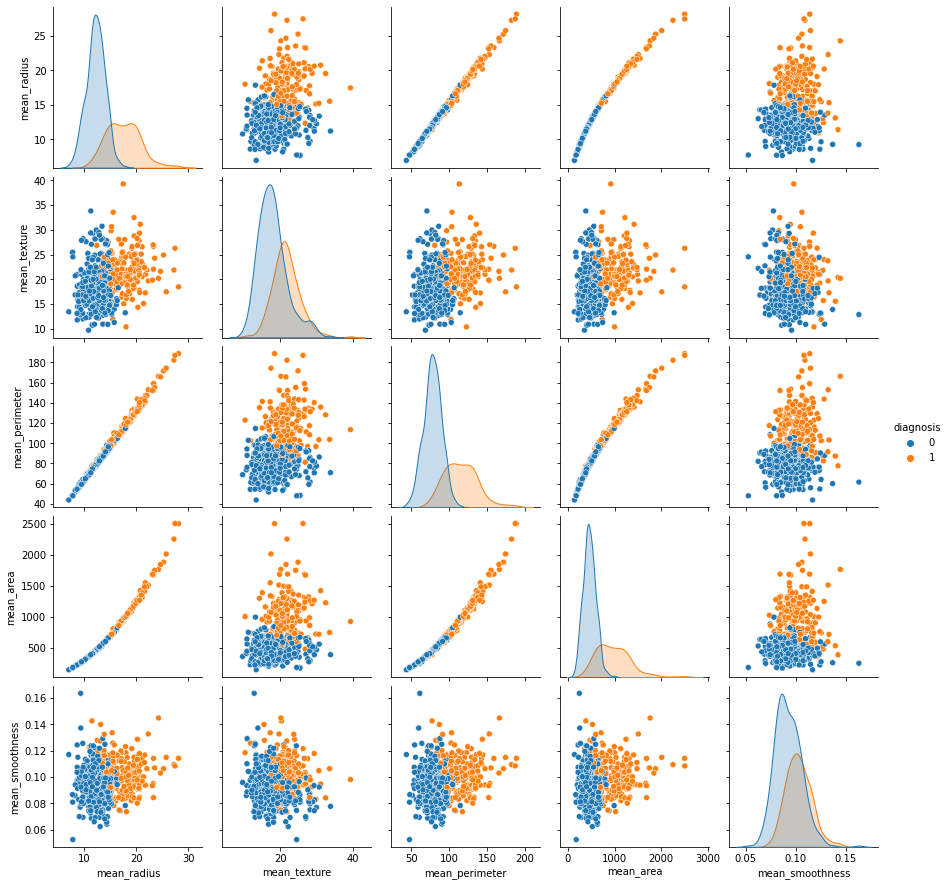

In [328]:
import seaborn as sns
sns.pairplot(dataset,hue = 'diagnosis')

In [329]:
#splitting features and output for further analysis
x = dataset.iloc[:,0:5]
y = dataset.iloc[:,5:]

We need to convert our data into standard scaler form since features are not in same range.

In [330]:
# converting data into standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
dataset = pd.DataFrame(x, columns=['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness'])


There are some outliers present in our data which hampers our predictions so we have identified indexes with outlier data and have dropped them(considered points outside 3 standard deviation as outliers).

In [331]:
# storing all column values in individual list to detect outliers separately in each column
mean_radius = dataset['mean_radius']
mean_texture = dataset['mean_texture']
mean_perimeter	 = dataset['mean_perimeter']
mean_area = dataset['mean_area']
mean_smoothness = dataset['mean_smoothness']

In [332]:
# function defined to store index value where outliers are present
index = []
def outlierslocation(featureArr):
  count = 0
  for count,i in enumerate(featureArr):
    if i <-3 or i >3:
      count = count +1
      index.append(count-1)
  return index


In [333]:
# calling function separately for all columns
outlierslocation(mean_radius)
outlierslocation(mean_texture)
outlierslocation(mean_perimeter)
outlierslocation(mean_area)
outlierslocation(mean_smoothness)

[82,
 180,
 212,
 352,
 461,
 219,
 232,
 239,
 259,
 82,
 122,
 180,
 212,
 352,
 461,
 521,
 82,
 122,
 180,
 212,
 339,
 352,
 461,
 521,
 3,
 105,
 122,
 504,
 568]

In [334]:
# creating function to get unique values in a list
def unique(list1):
    # initialize a null list
    unique_list = []
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

In [335]:
# Drpped rows with outliers
rowsToDrop = unique(index)
print(rowsToDrop)

[82, 180, 212, 352, 461, 219, 232, 239, 259, 122, 521, 339, 3, 105, 504, 568]


In [336]:
dataset.drop(rowsToDrop, axis=0, inplace=True)
y.drop(rowsToDrop, axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [337]:
#Dataset shape after dropping outliers
dataset.shape
y.shape

(553, 1)

After dropping outliers we are left with 553 records.

In [338]:
# splitting data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataset, y, test_size = 0.25, random_state = 0)

In [339]:
data = {}
sample1 = Y_train["diagnosis"] == 1
sample2 = Y_test["diagnosis"] == 1
data["cancer not present in train set"] = sample1.sum()
data["cancer present in train set"] = Y_train["diagnosis"].sum()
data["cancer not present in test set"] = sample2.sum()
data["cancer present in test set"] = Y_test["diagnosis"].sum()

In [340]:
df = pd.DataFrame(data.values(),data.keys(),['count'])
print(df)

                                 count
cancer not present in train set    148
cancer present in train set        148
cancer not present in test set      51
cancer present in test set          51


A quick summary is provided to visualize how data looks or count of points present in each dataset.

In [341]:
# Defined different models
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
LogisticRegressionClassifier = LogisticRegression(random_state = 0)
LogisticRegressionClassifier.fit(X_train, Y_train)

#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNeighborsClassifier.fit(X_train, Y_train)

#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
SVMClassifier = SVC(kernel = 'linear', random_state = 0)
SVMClassifier.fit(X_train, Y_train)

#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
KernelSVMClassifier = SVC(kernel = 'rbf', random_state = 0)
KernelSVMClassifier.fit(X_train, Y_train)

#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
NaiveBayesClassifier = GaussianNB()
NaiveBayesClassifier.fit(X_train, Y_train)

#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DecisionTreeClassifier.fit(X_train, Y_train)

#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RandomForestClassifier.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [342]:
#prediction:
LogisticRegressionClassifier_pred = LogisticRegressionClassifier.predict(X_test)
KNeighborsClassifier_pred = KNeighborsClassifier.predict(X_test)
SVMClassifier_pred = SVMClassifier.predict(X_test)
KernelSVMClassifier_pred = KernelSVMClassifier.predict(X_test)
NaiveBayesClassifier_pred = NaiveBayesClassifier.predict(X_test)
DecisionTreeClassifier_pred = DecisionTreeClassifier.predict(X_test)
RandomForestClassifier_pred = RandomForestClassifier.predict(X_test)

In [343]:
# Function for plotting confusion matrix for better visualisation
def confusionMatrix(cf_matrix):
  ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  return plt.show()

-----------------Logistic Regression----------------------
Confusion Matrix for Logistic Regression:-----------------


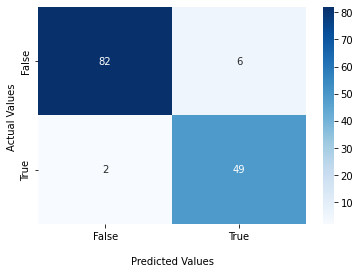

None
Classification for Logistic Regression:-------------------
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        88
           1       0.89      0.96      0.92        51

    accuracy                           0.94       139
   macro avg       0.93      0.95      0.94       139
weighted avg       0.94      0.94      0.94       139

----------------------------------------------------------
-----------------K Neighbor ------------------------------
Confusion Matrix for K Neighbor:--------------------------


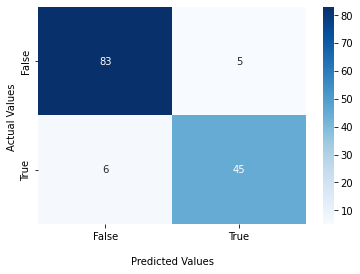

None
Classification for K Neighbor:----------------------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        88
           1       0.90      0.88      0.89        51

    accuracy                           0.92       139
   macro avg       0.92      0.91      0.91       139
weighted avg       0.92      0.92      0.92       139

----------------------------------------------------------
-------------------------SVM------------------------------
Confusion Matrix for SVM:---------------------------------


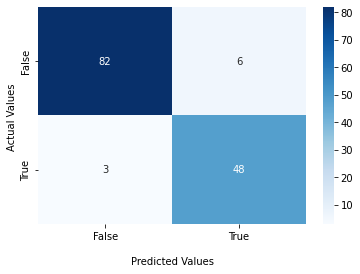

None
Classification for SVM:-----------------------------------
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        88
           1       0.89      0.94      0.91        51

    accuracy                           0.94       139
   macro avg       0.93      0.94      0.93       139
weighted avg       0.94      0.94      0.94       139

----------------------------------------------------------
----------------------Kernel SVM    ----------------------
Confusion Matrix for Kernel SVM:--------------------------


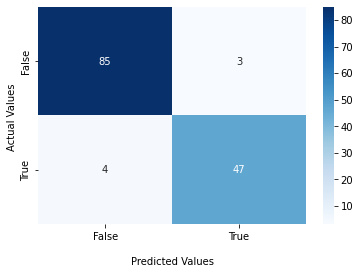

None
Classification for Kernel SVM:----------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        88
           1       0.94      0.92      0.93        51

    accuracy                           0.95       139
   macro avg       0.95      0.94      0.95       139
weighted avg       0.95      0.95      0.95       139

----------------------------------------------------------
---------------------Naive Bayes--------------------------
Confusion Matrix for Naive Bayes:-------------------------


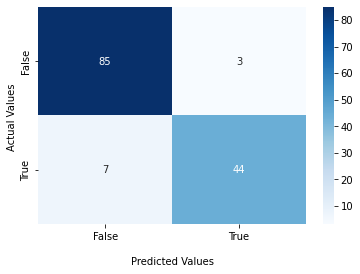

None
Classification for Naive Bayes:---------------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        88
           1       0.94      0.86      0.90        51

    accuracy                           0.93       139
   macro avg       0.93      0.91      0.92       139
weighted avg       0.93      0.93      0.93       139

----------------------------------------------------------
-----------------Decision Tree----------------------------
Confusion Matrix for Decision Tree:-----------------------


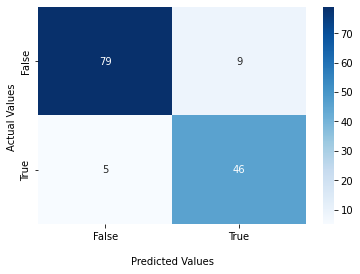

None
Classification for Decision Tree:-------------------------
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        88
           1       0.84      0.90      0.87        51

    accuracy                           0.90       139
   macro avg       0.89      0.90      0.89       139
weighted avg       0.90      0.90      0.90       139

----------------------------------------------------------
--------------------Random Forest-------------------------
Confusion Matrix for Random Forest:-----------------------


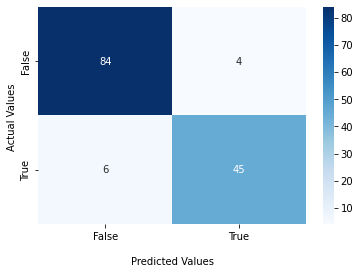

None
Classification for Random Forest:-------------------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        88
           1       0.92      0.88      0.90        51

    accuracy                           0.93       139
   macro avg       0.93      0.92      0.92       139
weighted avg       0.93      0.93      0.93       139

----------------------------------------------------------


In [344]:
from sklearn.metrics import confusion_matrix,classification_report
print("-----------------Logistic Regression----------------------")
print("Confusion Matrix for Logistic Regression:-----------------")
confusionmatrixLogistic = confusion_matrix(Y_test, LogisticRegressionClassifier_pred)
print(confusionMatrix(confusionmatrixLogistic))
print("Classification for Logistic Regression:-------------------")
print(classification_report(Y_test, LogisticRegressionClassifier_pred))
print("----------------------------------------------------------")
print("-----------------K Neighbor ------------------------------")
print("Confusion Matrix for K Neighbor:--------------------------")
confusionmatrixKNeighbor = confusion_matrix(Y_test, KNeighborsClassifier_pred)
print(confusionMatrix(confusionmatrixKNeighbor))
print("Classification for K Neighbor:----------------------------")
print(classification_report(Y_test, KNeighborsClassifier_pred))
print("----------------------------------------------------------")
print("-------------------------SVM------------------------------")
print("Confusion Matrix for SVM:---------------------------------")
confusionmatrixSVM = confusion_matrix(Y_test, SVMClassifier_pred)
print(confusionMatrix(confusionmatrixSVM))
print("Classification for SVM:-----------------------------------")
print(classification_report(Y_test, SVMClassifier_pred))
print("----------------------------------------------------------")
print("----------------------Kernel SVM    ----------------------")
print("Confusion Matrix for Kernel SVM:--------------------------")
confusionmatrixKernelSVM = confusion_matrix(Y_test, KernelSVMClassifier_pred)
print(confusionMatrix(confusionmatrixKernelSVM))
print("Classification for Kernel SVM:----------------------------")
print(classification_report(Y_test, KernelSVMClassifier_pred))
print("----------------------------------------------------------")
print("---------------------Naive Bayes--------------------------")
print("Confusion Matrix for Naive Bayes:-------------------------")
confusionmatrixNaieveBayes = confusion_matrix(Y_test, NaiveBayesClassifier_pred)
print(confusionMatrix(confusionmatrixNaieveBayes))
print("Classification for Naive Bayes:---------------------------")
print(classification_report(Y_test, NaiveBayesClassifier_pred))
print("----------------------------------------------------------")
print("-----------------Decision Tree----------------------------")
print("Confusion Matrix for Decision Tree:-----------------------")
confusionmatrixDecisionTree = confusion_matrix(Y_test, DecisionTreeClassifier_pred)
print(confusionMatrix(confusionmatrixDecisionTree))
print("Classification for Decision Tree:-------------------------")
print(classification_report(Y_test, DecisionTreeClassifier_pred))
print("----------------------------------------------------------")
print("--------------------Random Forest-------------------------")
print("Confusion Matrix for Random Forest:-----------------------")
confusionmatrixRandomForest = confusion_matrix(Y_test, RandomForestClassifier_pred)
print(confusionMatrix(confusionmatrixRandomForest))
print("Classification for Random Forest:-------------------------")
print(classification_report(Y_test, RandomForestClassifier_pred))
print("----------------------------------------------------------")

In [345]:
from sklearn.metrics import accuracy_score
LogisticRegressionClassifier_accuracy = accuracy_score(Y_test, LogisticRegressionClassifier_pred)
KNeighborsClassifier_accuracy = accuracy_score(Y_test, KNeighborsClassifier_pred)
SVMClassifier_accuracy = accuracy_score(Y_test, SVMClassifier_pred)
KernelSVMClassifier_accuracy = accuracy_score(Y_test, KernelSVMClassifier_pred)
NaiveBayesClassifier_accuracy = accuracy_score(Y_test, NaiveBayesClassifier_pred)
DecisionTreeClassifier_accuracy = accuracy_score(Y_test, DecisionTreeClassifier_pred)
RandomForestClassifier_accuracy = accuracy_score(Y_test, RandomForestClassifier_pred)

In [346]:
FinalAccuracy=[LogisticRegressionClassifier_accuracy,KNeighborsClassifier_accuracy,SVMClassifier_accuracy,KernelSVMClassifier_accuracy,NaiveBayesClassifier_accuracy,DecisionTreeClassifier_accuracy,RandomForestClassifier_accuracy]
FinalResult = pd.DataFrame(FinalAccuracy,["LogisticRegressionClassifier_accuracy","KNeighborsClassifier_accuracy","SVMClassifier_accuracy","KernelSVMClassifier_accuracy","NaiveBayesClassifier_accuracy","DecisionTreeClassifier_accuracy","RandomForestClassifier_accuracy"],["AccuracyScore"])

In [347]:
FinalResult

,AccuracyScore
LogisticRegressionClassifier_accuracy,0.942446
KNeighborsClassifier_accuracy,0.920863
SVMClassifier_accuracy,0.935252
KernelSVMClassifier_accuracy,0.949640
NaiveBayesClassifier_accuracy,0.928058
DecisionTreeClassifier_accuracy,0.899281
RandomForestClassifier_accuracy,0.928058


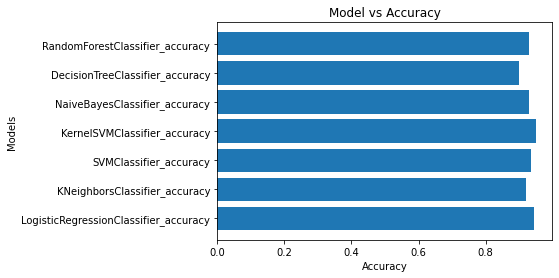

In [348]:
FinalResult1 = FinalResult.reset_index()
plt.barh(list(FinalResult1['index']),list(FinalResult1['AccuracyScore']))
plt.xlabel("Accuracy")
# setting y_label as price
plt.ylabel("Models")  
plt.title("Model vs Accuracy")
plt.show()

We see that '**Logistic Regression**' and '**Kernel SVM**' provides **highest accuracy** but that can not be the sole parameter to decide best model. Since, false negatives plays a critical role in situations like cancer.Predicting someone does not have cancer while he did. so, false negative or recall should be the main criteria to decide our final model.

<BarContainer object of 7 artists>

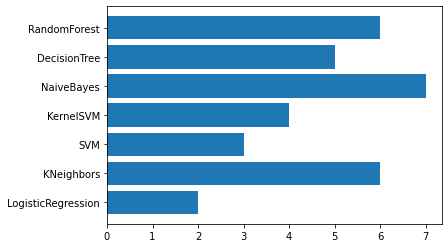

In [349]:
# we should aim at reducing false negative 
ModelNames = ['LogisticRegression','KNeighbors','SVM','KernelSVM','NaiveBayes','DecisionTree','RandomForest']
FalseNegative = [2,6,3,4,7,5,6]
Recall = [94,92,94,95,93,90,93]
plt.barh(ModelNames,FalseNegative)

<BarContainer object of 7 artists>

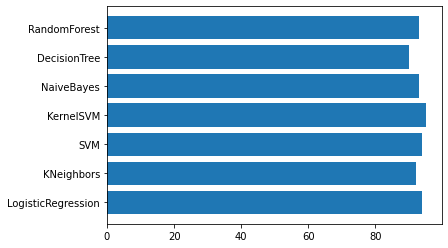

In [350]:
plt.barh(ModelNames,Recall)

Considering above two graphs we see that **Logistic Regression** had least number of false negative and it's recall value also has been pretty much high. so, Logistic regression remains our best bet for predicting cancer